In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('.\data\heart_2020_cleaned.csv')
# df = df.replace('?', np.nan)
# df.isnull().sum()
# df

In [66]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [74]:
from sklearn.preprocessing import LabelEncoder
def label2num(x):
    encoder = LabelEncoder()
    encoded = encoder.fit_transform(x)
    return encoded
df_transformed = df.copy()
categorical_columns = ["HeartDisease","Smoking","Stroke","DiffWalking","AlcoholDrinking","AgeCategory","Diabetic","GenHealth","Sex","Race", "PhysicalActivity","SkinCancer","KidneyDisease","Asthma"]
for x in categorical_columns:
    df_transformed[x] = label2num(df[x])

In [75]:
df_transformed.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [76]:
df_transformed.shape

(319795, 18)

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df_transformed.copy()
X = data.iloc[:,1:17]  #independent columns
y = data.iloc[:,0]    #target column 
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

               Specs          Score
4     PhysicalHealth  174751.529924
8        AgeCategory   33991.390453
10          Diabetic   15526.406399
3             Stroke   11922.577647
6        DiffWalking   11154.414931
15     KidneyDisease    6493.654143
5       MentalHealth    4243.691008
1            Smoking    2181.953023
0                BMI    1224.020726
7                Sex     823.195671
11  PhysicalActivity     718.810142
14            Asthma     475.647835


<AxesSubplot:>

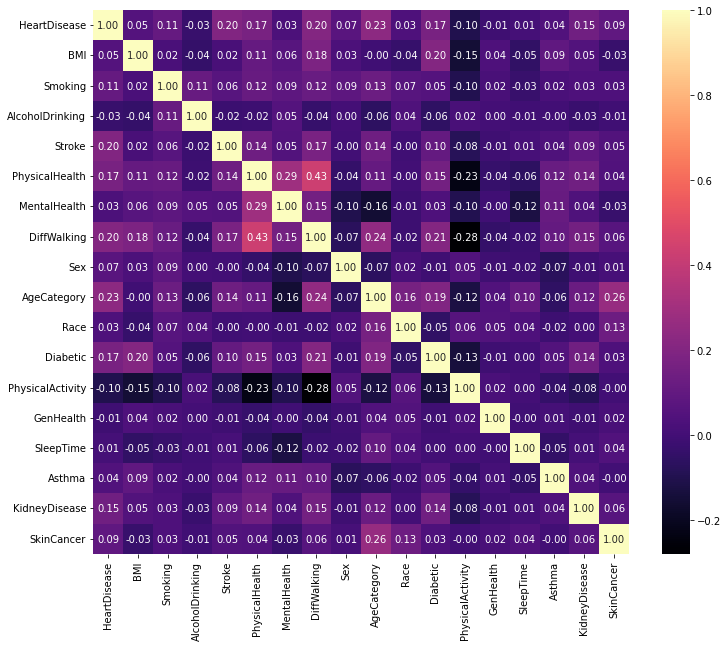

In [78]:
plt.figure(figsize=(12,10))
sns.heatmap(df_transformed.corr(),annot=True,cmap="magma",fmt='.2f')

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_transformed[["BMI","PhysicalHealth","MentalHealth","SleepTime"]] = scaler.fit_transform(df_transformed[["BMI","PhysicalHealth","MentalHealth","SleepTime"]])

In [53]:
df_transformed.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,0,7,5,2,1,4,-1.460354,1,0,1
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,0,12,5,0,1,4,-0.067601,0,0,0
2,0,-0.274603,1,0,0,2.091388,3.281069,0,1,9,5,2,1,1,0.628776,1,0,0
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,0,11,5,0,0,2,-0.763977,0,0,1
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,0,4,5,0,1,4,0.628776,0,0,0


In [58]:
from sklearn.model_selection import train_test_split
X = df_transformed.drop("HeartDisease",axis=1)
y = df_transformed["HeartDisease"]
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                    random_state=21)

In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
# y_predicted_labels = model.predict(x_test)
y_predicted_labels = model.predict_proba(x_test)

In [80]:
weights = model.coef_
abs_weights = np.abs(weights)

print(abs_weights)

[[0.09959846 0.4345226  0.27210664 1.13429735 0.17329638 0.08354444
  0.40921726 0.72698496 0.28391484 0.03525476 0.29890519 0.07692785
  0.02758083 0.0459149  0.33820674 0.69102631 0.09900211]]


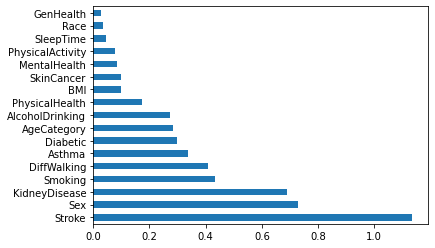

In [87]:
feat_importances = pd.Series(abs_weights[0], index=df.columns[1:])
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [61]:
y_predicted_labels

array([[0.97344762, 0.02655238],
       [0.91870679, 0.08129321],
       [0.99252405, 0.00747595],
       ...,
       [0.96154992, 0.03845008],
       [0.48764634, 0.51235366],
       [0.96486683, 0.03513317]])

In [60]:
model.score(x_test,y_test)

0.9142106662080395

In [62]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_predicted_labels = model.predict(x_test)

In [63]:
model.score(x_test,y_test)

0.9055645022592599